In [23]:
# Импортировать библиотеки: pandas, numpy, scikit-learn (CV, модели, метрики), matplotlib (для графиков).

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import RocCurveDisplay

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

In [2]:
# Загрузить выбранный CSV в pandas.DataFrame.
df = pd.read_csv("S06-hw-dataset-01.csv")

In [3]:
#Зафиксировать минимум:
# - head(), info(), базовые статистики (describe() или аналог);
df.head()

,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
0,1,-0.946058,-0.070313,1.824445,-2.754422,0.808865,-0.111094,-0.268950,-3.078210,0.801275,...,-1.616515,-1.989464,1.407390,-0.218362,2.016052,0,2,3,33,0
1,2,-2.484027,0.739378,1.596908,-2.586479,-0.033225,-3.054412,-4.706908,-9.795169,0.145911,...,-1.727040,-0.583997,1.136761,0.285978,-0.310879,2,2,2,102,1
2,3,1.522629,7.159635,-0.564903,-4.493110,1.623610,5.450187,-0.974595,-5.189589,1.600591,...,0.524408,2.022430,1.278358,-0.850547,0.847457,1,0,2,3,0
3,4,0.463373,-1.073908,1.752813,0.362786,2.790872,4.082385,0.322283,3.390984,-0.033929,...,2.399834,-1.431576,-0.746987,0.049639,2.414689,1,0,1,50,0
4,5,3.188390,-4.701692,-0.689918,-0.448995,0.373821,-3.275363,-1.760931,0.923689,0.537345,...,-2.183407,-2.896590,2.440343,-1.097168,1.457323,1,2,3,81,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12000 non-null  int64  
 1   num01          12000 non-null  float64
 2   num02          12000 non-null  float64
 3   num03          12000 non-null  float64
 4   num04          12000 non-null  float64
 5   num05          12000 non-null  float64
 6   num06          12000 non-null  float64
 7   num07          12000 non-null  float64
 8   num08          12000 non-null  float64
 9   num09          12000 non-null  float64
 10  num10          12000 non-null  float64
 11  num11          12000 non-null  float64
 12  num12          12000 non-null  float64
 13  num13          12000 non-null  float64
 14  num14          12000 non-null  float64
 15  num15          12000 non-null  float64
 16  num16          12000 non-null  float64
 17  num17          12000 non-null  float64
 18  num18 

In [5]:
df.describe()

,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,0.013705,-0.005278,-0.002357,0.038404,-0.006301,-0.865297,-0.702877,-0.290694,-0.008154,...,-0.323083,-1.314833,0.319798,-0.002742,0.027459,0.988750,1.990167,1.506833,36.083833,0.323417
std,3464.24595,2.096534,3.544498,1.004417,2.087318,1.007329,3.888966,1.989513,3.455981,0.996677,...,2.167066,3.731384,2.223649,0.996454,1.882359,0.815687,1.411643,1.121558,25.061218,0.467800
min,1.00000,-8.155181,-14.605579,-4.374043,-7.753301,-3.999332,-15.238402,-7.377252,-13.853627,-3.794637,...,-8.371050,-14.249204,-8.638879,-3.532093,-7.923990,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,-1.423844,-2.303772,-0.685618,-1.374579,-0.676552,-3.532054,-2.064888,-2.597019,-0.683959,...,-1.808969,-3.863063,-1.097700,-0.676150,-1.110822,0.000000,1.000000,0.000000,17.000000,0.000000
50%,6000.50000,-0.047565,0.053348,-0.009186,0.038766,-0.003728,-1.092517,-0.795907,-0.208245,-0.020883,...,-0.383940,-1.393400,0.431804,0.006297,0.279689,1.000000,2.000000,2.000000,30.000000,0.000000
75%,9000.25000,1.422676,2.335937,0.671441,1.484417,0.669269,1.526389,0.522625,2.093169,0.666959,...,1.125140,1.116111,1.853491,0.657478,1.363896,2.000000,3.000000,3.000000,49.000000,1.000000
max,12000.00000,8.610863,16.299709,3.651692,7.571965,4.562115,16.223054,8.006444,13.030011,3.976868,...,7.957847,15.937281,8.102095,3.707905,7.549514,2.000000,4.000000,3.000000,120.000000,1.000000


In [6]:
# распределение таргета target (доли классов);
target_distribution = df["target"].value_counts(normalize=True)
print("Распределение target:")
target_distribution

Распределение target:


target
0    0.676583
1    0.323417
Name: proportion, dtype: float64

In [7]:
# (желательно) проверку пропусков и типы столбцов.
print("\nПропуски в данных:")
df.isnull().sum().sum()  # должно быть 0


Пропуски в данных:


np.int64(0)

In [8]:
print("\nТипы данных по столбцам:")
df.dtypes


Типы данных по столбцам:


id                 int64
num01            float64
num02            float64
num03            float64
num04            float64
num05            float64
num06            float64
num07            float64
num08            float64
num09            float64
num10            float64
num11            float64
num12            float64
num13            float64
num14            float64
num15            float64
num16            float64
num17            float64
num18            float64
num19            float64
num20            float64
num21            float64
num22            float64
num23            float64
num24            float64
cat_contract       int64
cat_region         int64
cat_payment        int64
tenure_months      int64
target             int64
dtype: object

In [9]:
# Определить:

# Y – таргет (target)
y = df["target"]

# X – признаки (все столбцы, кроме target; столбец id не использовать как признак);
feature_cols = [col for col in df.columns if col not in ("id", "target")]
X = df[feature_cols]

In [10]:
# Разделить данные на train/test:

# test_size разумный (например, 0.2 или 0.25);
# обязательно фиксировать random_state (например, 42);
#для классификации – использовать stratify=y.

RANDOM_STATE = 42
TEST_SIZE = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y  # сохраняем пропорции классов
)

Без фиксации каждый запуск будет давать разные разбиения метрики будут «прыгать». Это мешает честному сравнению и воспроизвдению.

Стратификация обеспечивает корректную оценку качества модели, особенно при дисбалансе. `stratify=y` гарантирует, что доля классов в `train` и `test` будет такой же, как в исходных данных.

In [11]:
# Сделать минимум два baseline’а:

# DummyClassifier (например, most_frequent или stratified).
# LogisticRegression (желательно через Pipeline(StandardScaler + LogisticRegression)).

# Для обоих baseline’ов посчитать метрики на test (см. ниже) и кратко интерпретировать.

# Dummy
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)

# Предсказания
y_pred_dummy = dummy.predict(X_test)
y_proba_dummy = dummy.predict_proba(X_test)[:, 1]  # вероятность класса 1

# Метрики
dummy_acc = accuracy_score(y_test, y_pred_dummy)
dummy_f1 = f1_score(y_test, y_pred_dummy)
dummy_roc = roc_auc_score(y_test, y_proba_dummy)

print("=== DummyClassifier ===")
print(f"Accuracy: {dummy_acc:.4f}")
print(f"F1:       {dummy_f1:.4f}")
print(f"ROC-AUC:  {dummy_roc:.4f}")

=== DummyClassifier ===
Accuracy: 0.6767
F1:       0.0000
ROC-AUC:  0.5000


Accuracy = 0.6767 - модель всегда предсказывает наиболее частый класс. Это значит, что в тесте ~67.7% объектов относятся к этому классу.

F1 = 0.0000 - модель вообще не умеет находить объекты класса 1.

ROC-AUC = 0.5 - случайное угадывание. Модель не умеет отличать классы — вероятности одинаковы для всех объектов.

Это «нулевая» модель.

In [12]:
# Pipeline
logreg_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(
        C=1.0,               # начальное значение (можно потом подбирать)
        max_iter=1000,
        random_state=42
    ))
])

logreg_pipe.fit(X_train, y_train)

# Предсказания
y_pred_lr = logreg_pipe.predict(X_test)
y_proba_lr = logreg_pipe.predict_proba(X_test)[:, 1]

# Метрики
lr_acc = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_roc = roc_auc_score(y_test, y_proba_lr)

print("\n=== LogisticRegression ===")
print(f"Accuracy: {lr_acc:.4f}")
print(f"F1:       {lr_f1:.4f}")
print(f"ROC-AUC:  {lr_roc:.4f}")


=== LogisticRegression ===
Accuracy: 0.8275
F1:       0.7076
ROC-AUC:  0.8747


Accuracy = 0.8275 - модель правильно классифицирует ~83% объектов.

F1 = 0.7076 - сбалансированная оценка точности и полноты. Показывает, что модель хорошо работает с обоими классами, хотя, возможно, немного хуже с редким классом.

ROC-AUC = 0.8747 - очень хорошая способность отделять классы.

Логистическая регрессия — сильный baseline. Она показала, что данные достаточно информативны и линейно разделимы.

In [13]:
# CV-сплиттер
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

results = []
best_models = {}
search_summaries = {}

In [14]:
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)

dt_param_grid = {
    "max_depth": [3, 5, 8, None],
    "min_samples_leaf": [1, 5, 10, 20],
    # можно добавить "ccp_alpha": [0.0, 0.001, 0.005], но не обязательно одновременно
}

dt_search = GridSearchCV(
    dt,
    dt_param_grid,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1,
    refit=True
)

dt_search.fit(X_train, y_train)

search_summaries["DecisionTree"] = {
    "best_params": dt_search.best_params_,
    "best_cv_roc_auc": float(dt_search.best_score_)
}

# Сохраняем лучшую модель
best_dt = dt_search.best_estimator_
best_models["DecisionTree"] = best_dt

# Оценка на test
y_pred = best_dt.predict(X_test)
y_proba = best_dt.predict_proba(X_test)[:, 1]

results.append({
    "model": "DecisionTree",
    "accuracy": float(accuracy_score(y_test, y_pred)),
    "f1": float(f1_score(y_test, y_pred)),
    "roc_auc": float(roc_auc_score(y_test, y_proba))
})

print("DecisionTree - лучшие параметры:", dt_search.best_params_)

DecisionTree - лучшие параметры: {'max_depth': None, 'min_samples_leaf': 20}


In [15]:
rf = RandomForestClassifier(
    n_estimators=500,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

rf_param_grid = {
    "max_depth": [None, 6, 10],
    "min_samples_leaf": [1, 5, 10],
    "max_features": ["sqrt", 0.5]  # ← это "лесная" ручка!
}

rf_search = GridSearchCV(
    rf,
    rf_param_grid,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1,
    refit=True
)

rf_search.fit(X_train, y_train)

search_summaries["RandomForest"] = {
    "best_params": rf_search.best_params_,
    "best_cv_roc_auc": float(rf_search.best_score_)
}

best_rf = rf_search.best_estimator_
best_models["RandomForest"] = best_rf

y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

results.append({
    "model": "RandomForest",
    "accuracy": float(accuracy_score(y_test, y_pred)),
    "f1": float(f1_score(y_test, y_pred)),
    "roc_auc": float(roc_auc_score(y_test, y_proba))
})

print("RandomForest - лучшие параметры:", rf_search.best_params_)

RandomForest - лучшие параметры: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1}


In [16]:
base_stump = DecisionTreeClassifier(max_depth=1, random_state=RANDOM_STATE)

ada = AdaBoostClassifier(
    estimator=base_stump,
    random_state=RANDOM_STATE
)

ada_param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.1, 0.5, 1.0]
}

ada_search = GridSearchCV(
    ada,
    ada_param_grid,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1,
    refit=True
)

ada_search.fit(X_train, y_train)

search_summaries["AdaBoost"] = {
    "best_params": ada_search.best_params_,
    "best_cv_roc_auc": float(ada_search.best_score_)
}

best_ada = ada_search.best_estimator_
best_models["AdaBoost"] = best_ada

y_pred = best_ada.predict(X_test)
y_proba = best_ada.predict_proba(X_test)[:, 1]

results.append({
    "model": "AdaBoost",
    "accuracy": float(accuracy_score(y_test, y_pred)),
    "f1": float(f1_score(y_test, y_pred)),
    "roc_auc": float(roc_auc_score(y_test, y_proba))
})

print("AdaBoost - лучшие параметры:", ada_search.best_params_)

AdaBoost - лучшие параметры: {'learning_rate': 1.0, 'n_estimators': 200}


In [17]:
results_df = pd.DataFrame(results).sort_values("roc_auc", ascending=False)
print("\n=== Итоговые метрики на TEST ===")
print(results_df.to_string(index=False))


=== Итоговые метрики на TEST ===
       model  accuracy       f1  roc_auc
RandomForest  0.928750 0.884537 0.967863
DecisionTree  0.869167 0.794233 0.909757
    AdaBoost  0.846250 0.743215 0.906991


In [18]:
results_df = pd.DataFrame(results)

best_row = results_df.loc[results_df["roc_auc"].idxmax()]
best_model_name = best_row["model"]
best_roc_auc = best_row["roc_auc"]
best_model = best_models[best_model_name]

print(f"Лучшая модель: {best_model_name} (ROC-AUC = {best_roc_auc:.4f})")

Лучшая модель: RandomForest (ROC-AUC = 0.9679)


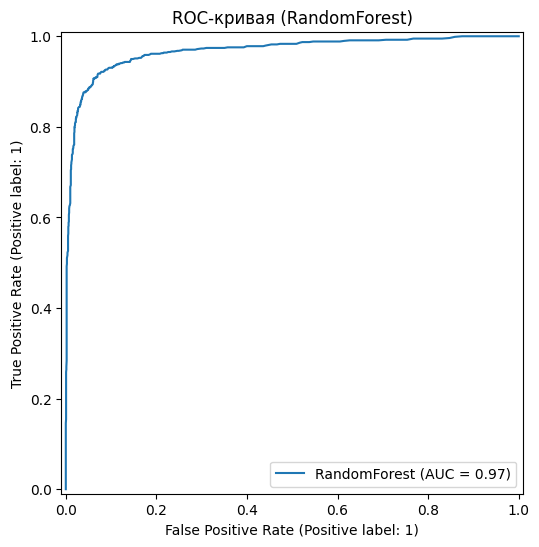

In [19]:
# Создаём папку для графиков
os.makedirs("artifacts/figures", exist_ok=True)

# ROC-кривая
fig, ax = plt.subplots(figsize=(6, 6))
RocCurveDisplay.from_estimator(
    best_model,
    X_test, y_test,
    ax=ax,
    name=best_model_name
)
ax.set_title(f"ROC-кривая ({best_model_name})")
plt.savefig("artifacts/figures/roc_curve.png", dpi=300, bbox_inches="tight")
plt.show()

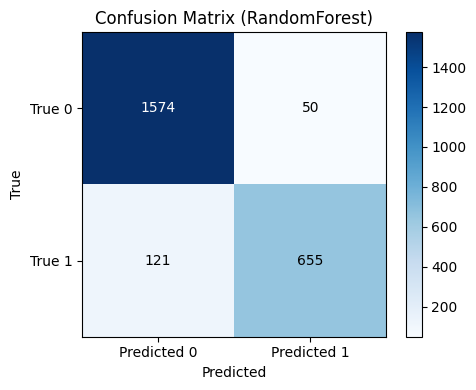

In [20]:
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

fig, ax = plt.subplots(figsize=(5, 4))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(
    xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["True 0", "True 1"],
    title=f"Confusion Matrix ({best_model_name})",
    xlabel="Predicted",
    ylabel="True"
)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.savefig("artifacts/figures/confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

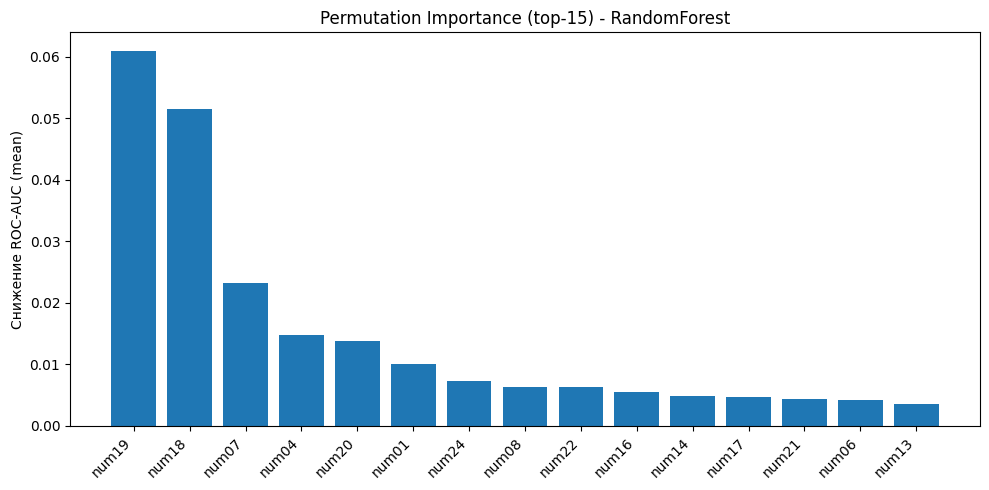

In [21]:
perm = permutation_importance(
    best_model,
    X_test,
    y_test,
    n_repeats=10,
    random_state=RANDOM_STATE,
    scoring="roc_auc"
)

feature_names = X.columns.tolist()

importances = perm.importances_mean
indices = np.argsort(importances)[::-1][:15]

plt.figure(figsize=(10, 5))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(
    range(len(indices)),
    [feature_names[i] for i in indices],
    rotation=45,
    ha="right"
)
plt.ylabel("Снижение ROC-AUC (mean)")
plt.title(f"Permutation Importance (top-15) - {best_model_name}")
plt.tight_layout()
plt.savefig("artifacts/figures/permutation_importance.png", dpi=300, bbox_inches="tight")
plt.show()

In [22]:
import json
import joblib
from pathlib import Path

ARTIFACTS_DIR = Path("artifacts")
ARTIFACTS_DIR.mkdir(parents=True, exist_ok=True)

metrics_path = ARTIFACTS_DIR / "metrics_test.json"
with open(metrics_path, "w", encoding="utf-8") as f:
    json.dump(
        {"results": results_df.to_dict(orient="records")},
        f,
        ensure_ascii=False,
        indent=2
    )

search_path = ARTIFACTS_DIR / "search_summaries.json"
with open(search_path, "w", encoding="utf-8") as f:
    json.dump(search_summaries, f, ensure_ascii=False, indent=2)

model_path = ARTIFACTS_DIR / "best_model.joblib"
joblib.dump(best_model, model_path)

meta = {
    "best_model_label": best_model_name,
    "test_metrics": best_row.to_dict(),
    "search_summary": search_summaries.get(best_model_name, None),
    "random_state": RANDOM_STATE
}
meta_path = ARTIFACTS_DIR / "best_model_meta.json"
with open(meta_path, "w", encoding="utf-8") as f:
    json.dump(meta, f, ensure_ascii=False, indent=2)

print("Артефакты сохранены:")
print(f" - {metrics_path}")
print(f" - {search_path}")
print(f" - {model_path}")
print(f" - {meta_path}")

Артефакты сохранены:
 - artifacts\metrics_test.json
 - artifacts\search_summaries.json
 - artifacts\best_model.joblib
 - artifacts\best_model_meta.json
